<a href="https://colab.research.google.com/github/Briarenee22/customer-purchase-predictions/blob/main/Customer_purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#load dataset
df = pd.read_csv ("customer_purchase.csv")



In [20]:
df.shape

(1500, 9)

In [21]:
df.head ()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.26794,8,0,30.568601,0,5,1
1,20,1,23579.77358,4,2,38.240097,0,5,0
2,27,1,127821.30640,11,2,31.633212,1,0,1
3,24,1,137798.62310,19,3,46.167059,0,4,1
4,31,1,99300.96422,19,1,19.823592,0,0,1


In [22]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [23]:
df.describe ()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164339,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512520,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581475,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772900,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176500,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [24]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.26794,8,0,30.568601,0,5,1
1,20,1,23579.77358,4,2,38.240097,0,5,0
2,27,1,127821.30640,11,2,31.633212,1,0,1
3,24,1,137798.62310,19,3,46.167059,0,4,1
4,31,1,99300.96422,19,1,19.823592,0,0,1


In [25]:
#dropping unecessary columns that are not required for modeling
df.drop(columns=["ProductCategory", "Gender"], inplace=True)

In [26]:
# Define features (X) and target (y), then split into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop(columns=["PurchaseStatus"])  # Features
y = df["PurchaseStatus"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print to confirm the shape
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (1200, 6) (1200,)
Test Set Shape: (300, 6) (300,)


In [27]:
# Check skewness of numerical features
print(df[["AnnualIncome", "NumberOfPurchases", "TimeSpentOnWebsite"]].skew())


AnnualIncome          0.002403
NumberOfPurchases    -0.098019
TimeSpentOnWebsite   -0.031322
dtype: float64


In [28]:
scaler = StandardScaler()
numerical_cols = ["Age", "AnnualIncome", "NumberOfPurchases", "TimeSpentOnWebsite", "DiscountsAvailed"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [29]:
#checking the class distribution of target value
print(df ["PurchaseStatus"].value_counts())


PurchaseStatus
0    852
1    648
Name: count, dtype: int64


In [30]:
# Define Features (X) and Target Variable (y)
X = df.drop(columns=["PurchaseStatus"])  # Features
y = df["PurchaseStatus"]  # Target variable


Insights:


1. Product and Gender columns were removed as they are not necessary for modeling
2. Class imbalance identified in the targed
3. No missing values





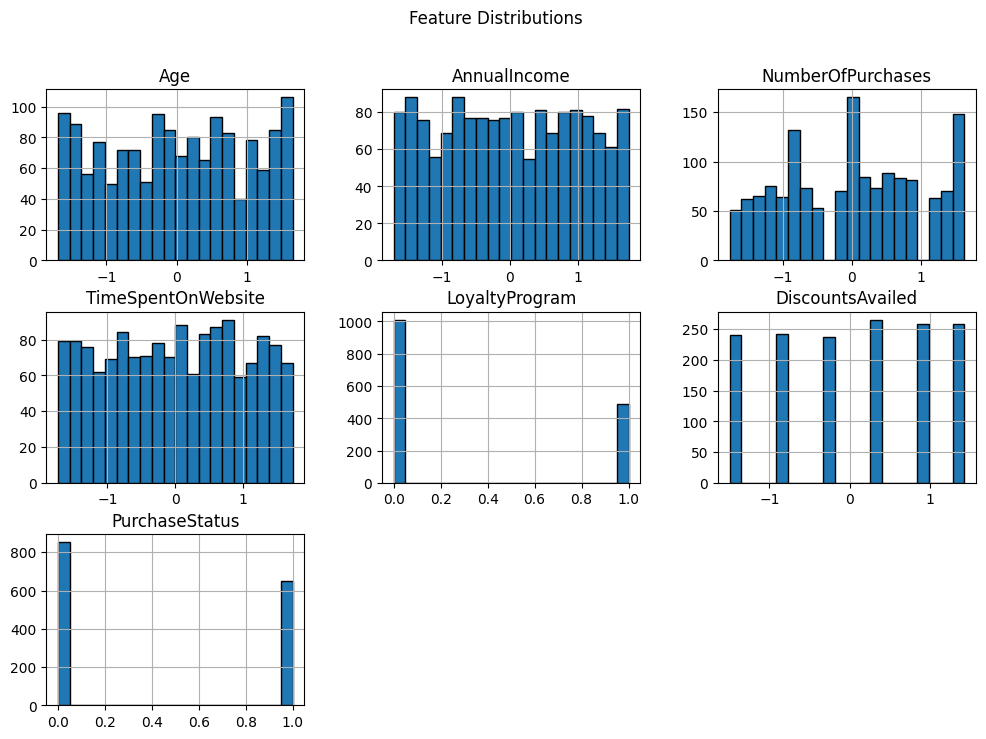

In [31]:
# Plot histograms for numerical features
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()


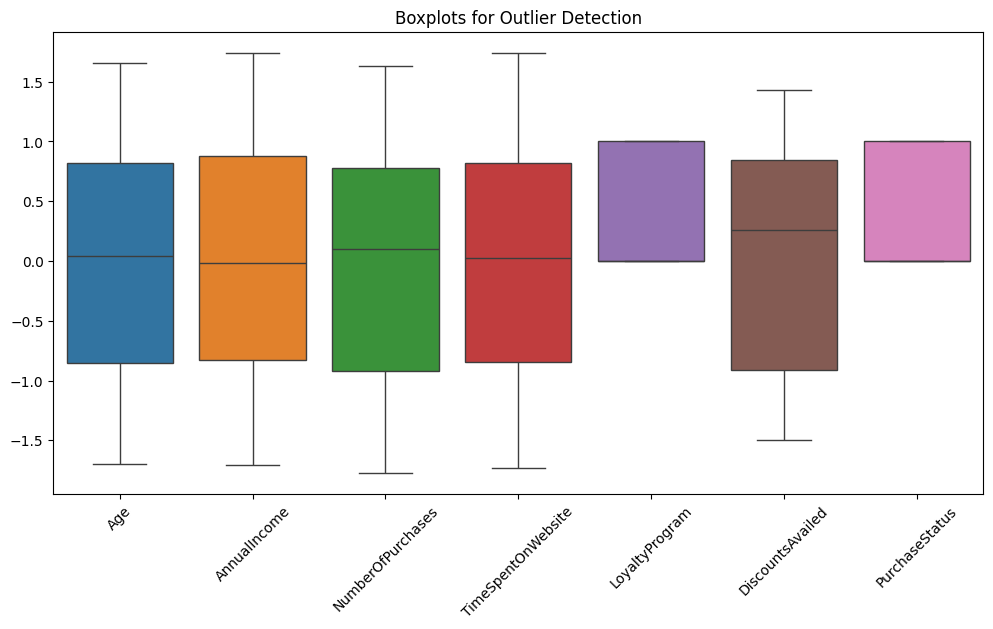

In [32]:
# Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

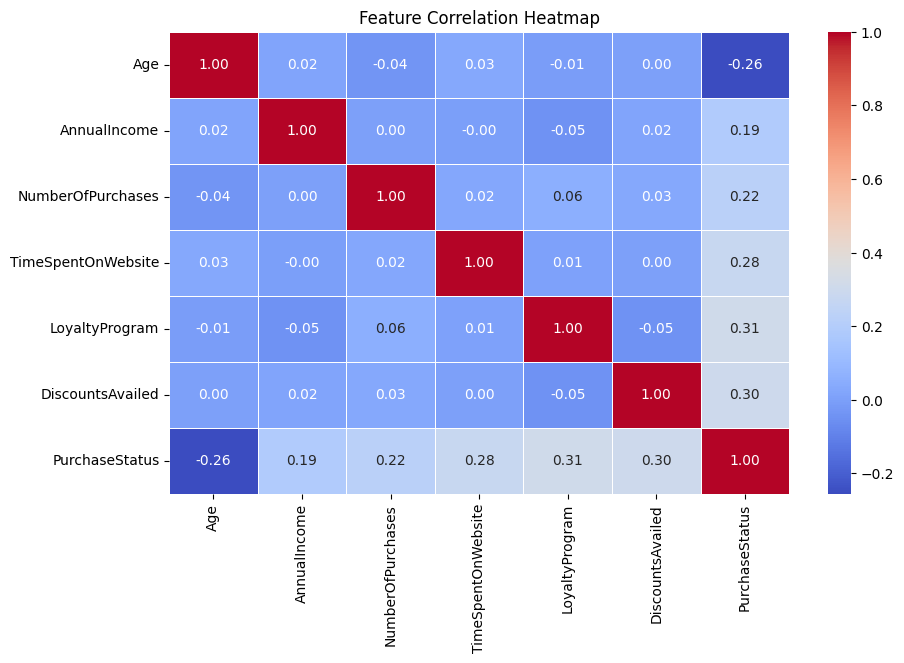

In [33]:
# Generate Correlation Heatmap to See Feature Relationships
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [34]:
# ================================
# Model 1: Logistic Regression
# ================================
from sklearn.linear_model import LogisticRegression

In [35]:
# Initialize the model
lr_model = LogisticRegression()

# Initialize model with more iterations
lr_model = LogisticRegression(max_iter=500)

In [36]:
# Fit the model
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [37]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       172
           1       0.88      0.73      0.79       128

    accuracy                           0.84       300
   macro avg       0.85      0.83      0.83       300
weighted avg       0.84      0.84      0.84       300


Confusion Matrix:
 [[159  13]
 [ 35  93]]


## Logistic Regression Insights

- Accuracy: 84%
- Strengths: Simple, interpretable
- Weaknesses: Slightly lower recall for class 1 (purchasers)


In [38]:
# ===============================
# Decision Tree Model
# ===============================
from sklearn.tree import DecisionTreeClassifier

In [39]:
# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [41]:
print("\nDecision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))



Decision Tree Results
Accuracy: 0.9033333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       172
           1       0.94      0.83      0.88       128

    accuracy                           0.90       300
   macro avg       0.91      0.89      0.90       300
weighted avg       0.91      0.90      0.90       300

Confusion Matrix:
 [[165   7]
 [ 22 106]]


## Decision Tree Classifier Insights

The Decision Tree model achieved **90% accuracy**, improving on Logistic Regression.

###  Key Metrics:
- **Precision (Class 1)**: 0.94
- **Recall (Class 1)**: 0.83
- **F1-Score (Class 1)**: 0.88

###  Notes:
- Better at identifying purchasers than Logistic Regression
- Balanced overall performance
- May overfit slightly without tuning

Overall, a strong model with high accuracy and useful insights for classification.

In [42]:
# ===============================
# Random Forest Model
# ===============================
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [45]:
# Evaluate performance
print("\n Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


 Random Forest Results
Accuracy: 0.9566666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       172
           1       0.99      0.91      0.95       128

    accuracy                           0.96       300
   macro avg       0.96      0.95      0.96       300
weighted avg       0.96      0.96      0.96       300

Confusion Matrix:
 [[171   1]
 [ 12 116]]


## Random Forest Classifier Insighta

The Random Forest model achieved **95.7% accuracy**, the highest of all three models.

### Key Metrics:
- Precision (Class 1): 0.99
- Recall (Class 1): 0.91
- F1-Score (Class 1): 0.95

### Notes:
- Excellent at identifying actual purchasers (class 1)
- Very few false positives or false negatives
- Most balanced and reliable model overall

This model is ideal for predicting customer purchase behavior with high confidence.


##  What Drives Purchases?

Below is a feature importance chart showing the top factors that influence whether a customer makes a purchase.

In [46]:
# Plot feature importance from Random Forest
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [47]:
# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

In [48]:
# Create DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

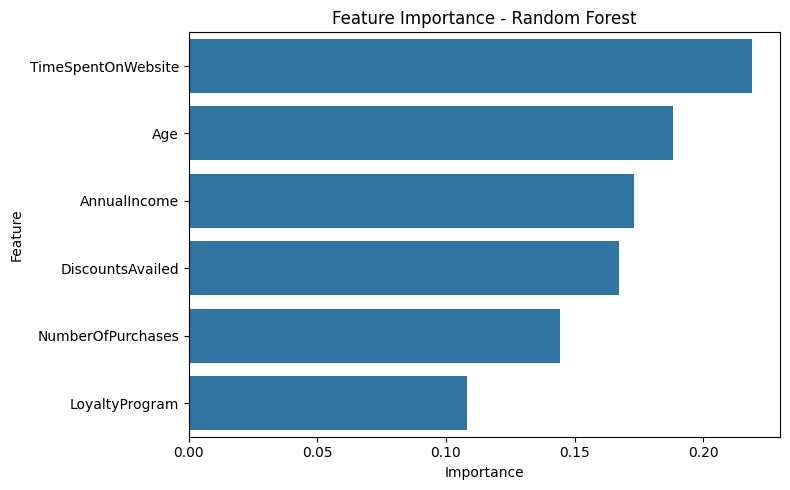

In [49]:
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()